## Maestria en Ciencia de datos
### Guia final -  Detalla de ordenes 
##### Analisis de datos por:Yodid Cardenas



###### Se importa libreria pandas y matplolibt
###### Se leen los dos archivos Details y orders desde Github
###### Se realiza concatenado por la columna Order ID
###### Se imprime el dataframe

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del archivo CSV en formato "raw"
url1 = 'https://raw.githubusercontent.com/yodidj/Ciencia-Datos/main/Details.csv'
url2 = 'https://raw.githubusercontent.com/yodidj/Ciencia-Datos/main/Orders.csv'

# Leer el archivo CSV
details = pd.read_csv(url1)
orders = pd.read_csv(url2)


In [75]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


##### Se evidencia diferencia en las columnas con una unica llave llamada "Order ID"

In [49]:

# Unir los DataFrames usando la columna 'Order ID' con merge
df_concatenado = pd.merge(details, orders, on='Order ID', how='inner')

# Mostrar el DataFrame resultante
print(df_concatenado)



     Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0     B-25681    1096     658         7  Electronics  Electronic Games   
1     B-26055    5729      64        14    Furniture            Chairs   
2     B-25955    2927     146         8    Furniture         Bookcases   
3     B-26093    2847     712         8  Electronics          Printers   
4     B-25602    2617    1151         4  Electronics            Phones   
...       ...     ...     ...       ...          ...               ...   
1495  B-25700       7      -3         2     Clothing       Hankerchief   
1496  B-25757    3151     -35         7     Clothing          Trousers   
1497  B-25973    4141    1698        13  Electronics          Printers   
1498  B-25698       7      -2         1     Clothing       Hankerchief   
1499  B-25993    4363     305         5    Furniture            Tables   

      PaymentMode  Order Date CustomerName           State     City  
0             COD  04-06-2018       Bhawn

In [53]:
# Revisamos que la cantidad de datos sea la correcta
df_concatenado.shape

(1500, 11)

In [55]:
# Se revisa el tipo de dato de cada una de las 11 columnas
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


#### Usamos la libreria matplotlib para hacer graficas como histogramas

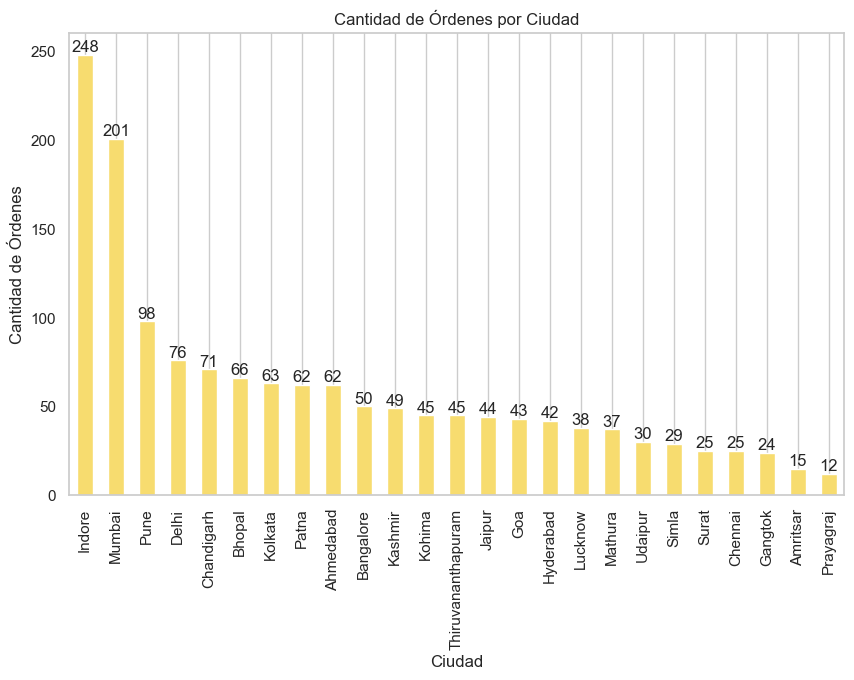

In [57]:
# Contar la cantidad de órdenes por ciudad
ordenes_por_ciudad = df_concatenado['City'].value_counts()

# Histograma
plt.figure(figsize=(10, 6))
ax=ordenes_por_ciudad.plot(kind='bar', color='#f7dc6f')

# Añadir números encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Añadir títulos y etiquetas
plt.title('Cantidad de Órdenes por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Órdenes')
plt.grid(axis='y')


#### Usando Seaborn para mejorar visualmente la grafica, previamente instalado "pip install seaborn"

C:\Users\yodid\AppData\Local\Temp\ipykernel_23272\3337380736.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='City', y='Count', data=ordenes_por_ciudad, palette='viridis')


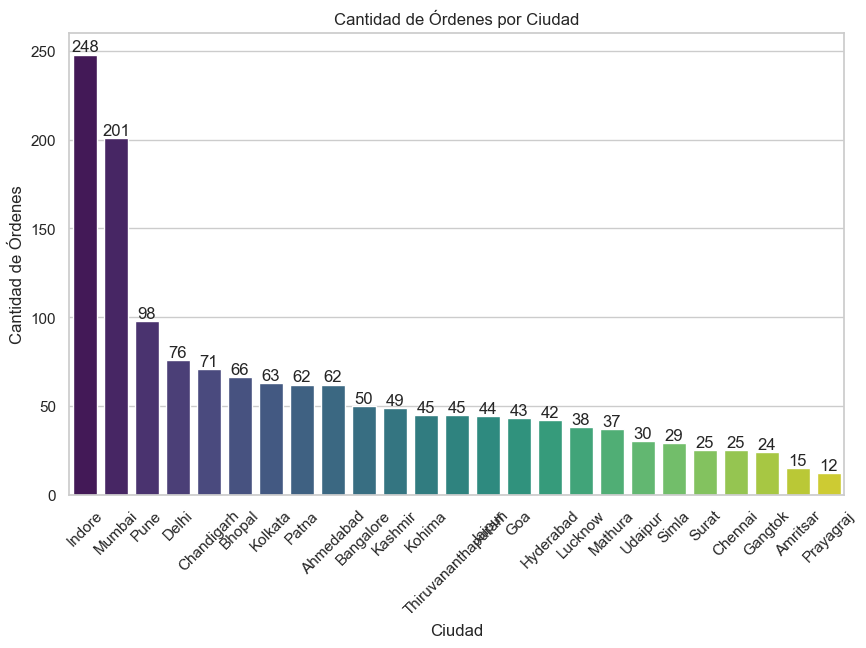

In [59]:
# Contar la cantidad de órdenes por ciudad
ordenes_por_ciudad = df_concatenado['City'].value_counts().reset_index()
ordenes_por_ciudad.columns = ['City', 'Count']

# Gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='City', y='Count', data=ordenes_por_ciudad, palette='viridis')

# Añadir números encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title('Cantidad de Órdenes por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=45)
plt.show()

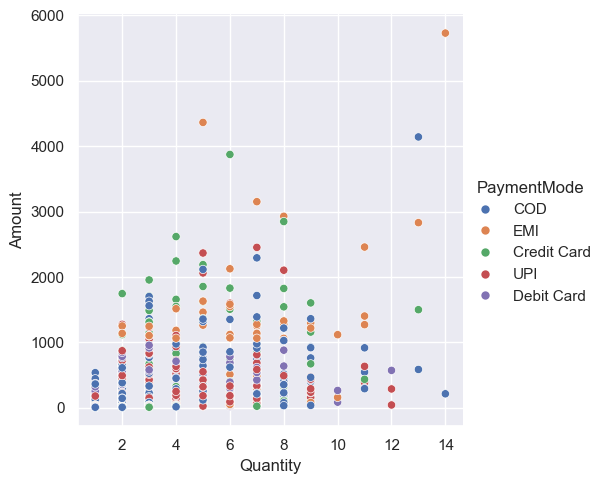

In [77]:
# Configurar el tema de Seaborn
sns.set_theme()

# Gráfica de dispersión con 'Paymethod' como hue
sns.relplot(
    data=df_concatenado,
    x="Quantity", 
    y="Amount",
    hue="PaymentMode",
    kind="scatter"
)

plt.show()

##### En esta grafica de dispersión vemos la cantidad vs el monto mostrando el metodo del pago

[Text(0, 0.5, 'Metodo de pago')]

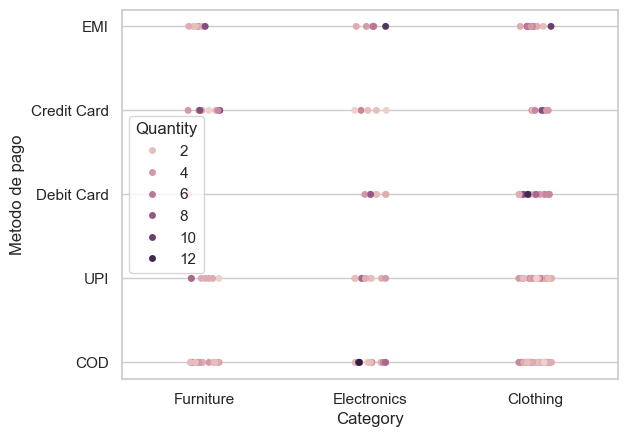

In [63]:
sns.set_theme(style="whitegrid", palette="muted")

#  cargara archivo
df = pd.read_csv("https://raw.githubusercontent.com/yodidj/Ciencia-Datos/main/orderSales_concat1.csv")

# Convertir 'Fecha de pedido' a formato de fecha y hora con dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extraer el mes de 'Fecha de pedido' y se convierte en cadena
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Filtrar para un mes específico (e.g., '2018-01')
df_filtered = df[df['Order Month'] == '2018-01']

ax = sns.stripplot(data=df_filtered, x="Category", y="PaymentMode", hue="Quantity", jitter=True)
ax.set(ylabel="Metodo de pago")


In [13]:
##### En se grafico podemos visualizar por categoria y metodo de pago con respecto a la cantidad

C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(5.125000000000002, 0.5, 'Order Month')]

C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yodid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


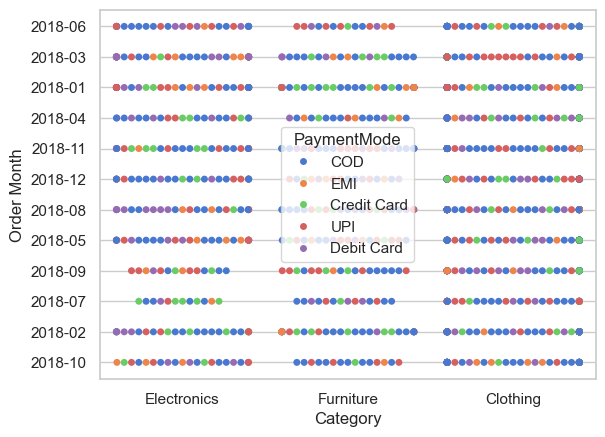

In [35]:
# Set the theme
sns.set_theme(style="whitegrid", palette="muted")

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/yodidj/Ciencia-Datos/main/orderSales_concat1.csv")

# Convert 'Order Date' to datetime format with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extract the month from 'Order Date' and convert to string
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Category", y="Order Month", hue="PaymentMode")
ax.set(ylabel="Order Month")

C:\Users\yodid\AppData\Local\Temp\ipykernel_23272\3419631643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Count', data=ordenes_por_ciudad, palette='viridis')


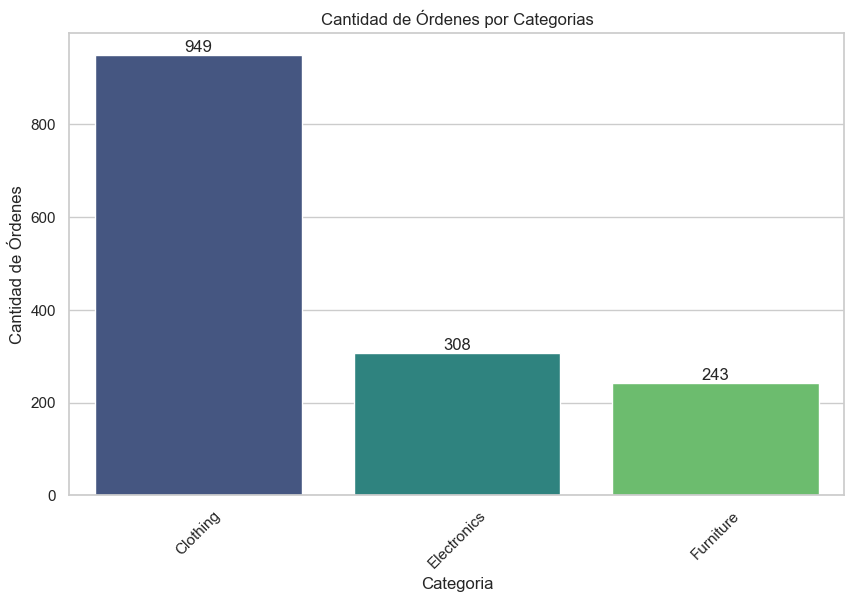

In [65]:
# Contar la cantidad de órdenes por ciudad
df = pd.read_csv("https://raw.githubusercontent.com/yodidj/Ciencia-Datos/main/orderSales_concat1.csv")
ordenes_por_ciudad = df['Category'].value_counts().reset_index()
ordenes_por_ciudad.columns = ['Category', 'Count']

# Gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Count', data=ordenes_por_ciudad, palette='viridis')

# Añadir números encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title('Cantidad de Órdenes por Categorias')
plt.xlabel('Categoria')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=45)
plt.show()

##### Se envidencia que la mayoria de ordenes corresponde a ropa seguido por electronica y finalmente muebles

##### Conclusiones:
###### El dataframe estaba limpio 
###### No tenia datos nulos 
###### Este tipo de analisis sirve para revisar claramente el comportamiento de ordenes 